<a href="https://colab.research.google.com/github/mehrdad117/Brain-Age-prediction-/blob/main/final_step_model_evaluation2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#@title Default title text
!pip install tpot
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
 
 
import pandas as pd #this is how we usually import pandas
import numpy as np #this is how we usually import numpy
 
import matplotlib #only needed to determine Matplotlib version number
#import tables # pytables is needed to read and write hdf5 files
#import openpyxl # is used to read and write MS Excel files
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
 
import xgboost
 
import warnings
warnings.filterwarnings('ignore')

load data 

In [32]:

#train_pre2 = pd.read_csv('/content/drive/MyDrive/Finalfinal.csv')


train_pre2 = pd.read_csv('/content/drive/MyDrive/Finalfinalplusval.csv')


train_pre2 = train_pre2.drop('SubjectID' , axis=1)


#size_mapping = {
     #   #   'M': 0,
       #    'F': 1,
        #         }

#train_pre2['Sex'] = train_pre2['Sex'].map(size_mapping)

features_all = train_pre2.drop('Age', axis=1) #.values
target = train_pre2['Age']
target = target.values #.reshape(-1,1)

features_all.shape

(80, 407)

In [71]:
newdata = pd.read_csv('/content/drive/MyDrive/new.csv')


newdata = newdata.drop('SubjectID' , axis=1)
newdata.shape


(20, 407)

# **split**


In [68]:

X_train, X_test, y_train, y_test = train_test_split(features_all, target,
                                                    train_size=0.88, test_size=0.12, random_state=42)

In [45]:
X_train.shape ,X_test.shape

((70, 407), (10, 407))

# **feature selection **

In [69]:

features_all = pd.DataFrame(features_all)

# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = train_pre2.corr(method='spearman')

# optional: display a heatmap of the correlation matrix
#plt.figure(figsize=(11,11))
#sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8 :
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_test.shape, X_train.shape

((10, 247), (70, 247))

drop these features from test dataset 

In [72]:
newdata.drop(labels=corr_features, axis=1, inplace=True)
newdata.shape

(20, 247)

# **model**

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split

model =   ElasticNetCV(l1_ratio=0.7000000000000001, tol=0.0001)

#model =  ElasticNetCV(l1_ratio=0.7000000000000001, tol=0.146, cv=30)


# **over fitting / underfitting**

calculate MAE/MSE for train and test dataset to calculate overfitting / underfitting

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)
    return mae
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions1 = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions1)
    return mae
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error




train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, model)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('test/train: {}'.format(round(test_error/train_error, 1)))
  

train error: 5.529 | test error: 5.9
test/train: 1.1


# **kfold score**

In [58]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

# prepare the cross-validation procedure
cv1 = KFold(n_splits=10, random_state=42, shuffle=True)

# LeaveOneOut()

# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut() ,scoring='neg_mean_absolute_error', n_jobs=-1)


cv_predicts_k_folds = cross_val_predict(model, X_train, y_train, cv=10)

print("Predicted class for each record: {}".format(cv_predicts_k_folds))
print("MAE score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Predicted class for each record: [38.2474726  55.3156152  23.96335295 29.25453428 55.34098051 28.87492004
 62.45268548 44.00919115 51.06297726 66.00924544 44.93905229 36.95676617
 38.71309403 26.87156307 53.00625603 45.05570354 31.23945245 38.53728898
 37.22454571 52.60805233 49.57920416 48.33456413 41.68037064 35.51220525
 64.86361147 37.71267414 33.92671916 41.87147711 40.31497179 51.24041428
 50.4780503  47.82243694 29.8762062  55.2330792  43.83659244 29.87027499
 43.79526517 43.18832859 35.46448967 44.55161492 49.12342656 29.15121242
 51.85838014 56.88776801 39.10188479 50.62310397 50.34087116 40.09826261
 47.4062007  55.29582204 54.7225215  50.42492478 52.27627849 53.36324214
 26.66684969 44.47910674 51.32354201 65.80975226 52.96258141 77.36416515
 45.40666374 51.97850891 36.13690311 51.5453885  55.27216309 42.55035885
 26.8200674  33.20494479 56.21340449 20.10388515]
MAE score in each iteration: [ -8.90665543  -5.02243423  -1.02716087  -4.61172625  -1.84190098
  -0.10213755  -3.6

# **learning curve**

# #1

Mean training scores

 6     5.756296
20    5.314196
34    5.124778
48    5.336638
63    5.509782
dtype: float64

 --------------------

Mean validation scores

 6     12.166099
20     7.960102
34     7.522861
48     7.030584
63     6.454694
dtype: float64


(0.0, 40.0)

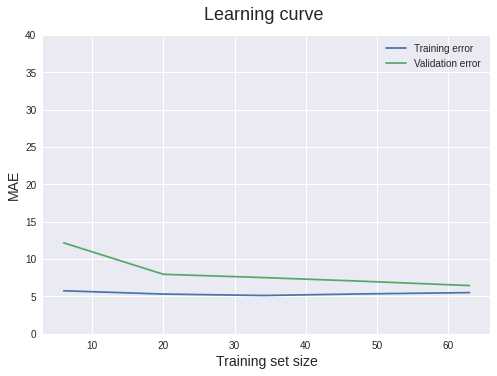

In [59]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, shuffle=True, random_state=42)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


### Plotting the two learning curves ###

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)


# #2

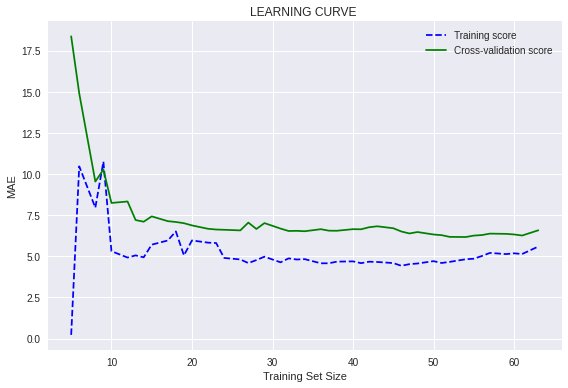

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.01, 1.0, 50)) 

# Mean and Standard Deviation of training scores 
mean_training = -np.mean(training_scores, axis=1) 
Standard_Deviation_training = -np.std(training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = -np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = -np.std(testing_scores, axis=1) 

# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b", label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 

# Standard Deviation of testing scores 
#plt.plot(sizes, Standard_Deviation_training, '--', color="b", label="Training score") 
#plt.plot(sizes, Standard_Deviation_testing, color="g", label="Cross-validation score")


# Drawing plot 
plt.title("LEARNING CURVE ") 
plt.xlabel("Training Set Size"), plt.ylabel("MAE"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()


# #3

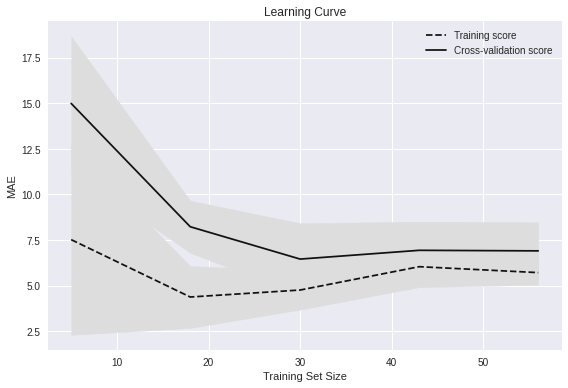

In [52]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, scoring='neg_mean_absolute_error', n_jobs=-1, shuffle=True, random_state=42)



train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1 )


# Create means and standard deviations of training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(valid_scores, axis=1)
test_std = -np.std(valid_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("MAE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# **Validation curve**

cv 

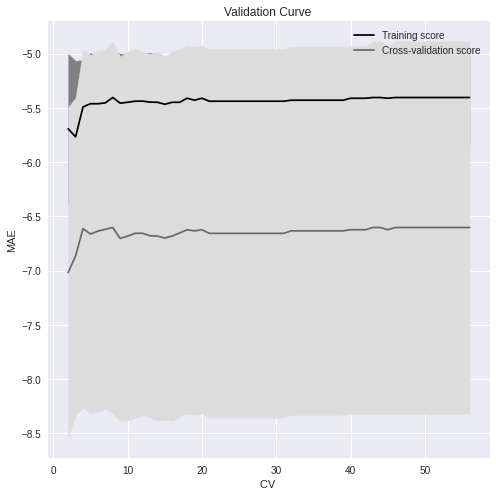

In [60]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0, 60, 1)

train_scores, test_scores = validation_curve(model,
                                  X_train, y_train, param_name="cv", param_range=param_range,
                                  scoring="neg_mean_absolute_error", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve ")
plt.xlabel("CV ")
plt.ylabel("MAE")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

tol

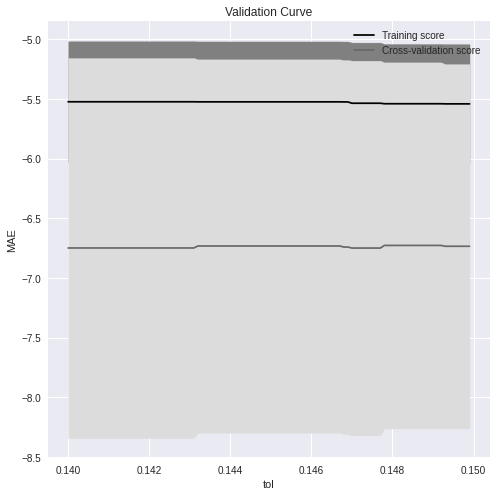

In [61]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0.14, 0.15, 0.0001)

train_scores, test_scores = validation_curve(model,
                                  X_train, y_train, param_name="tol", param_range=param_range,
                                  scoring="neg_mean_absolute_error", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve")
plt.xlabel("tol")
plt.ylabel("MAE")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [76]:
#model.fit(features_all, target)

model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.7000000000000001, max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [77]:
results = model.predict(newdata)
results.shape

(20,)

In [78]:
results

array([26.59778834, 43.6690856 , 43.76424722, 44.73434741, 35.83510685,
       31.40352438, 34.63108094, 22.8706318 , 51.6846578 , 50.89316391,
       60.89566159, 32.95379777, 33.26444163, 62.69154355, 54.91335367,
       54.59510886, 50.59802055, 56.17790168, 27.65176453, 49.40824835])

In [79]:
import numpy 
import pandas as pd
numpy.savetxt('data.csv',results ,delimiter=',')

GridSearchCV

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Use grid search to tune the parameters:

parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_absolute_error', cv=10)
grid.fit(X_train, y_train)
Y_pred = grid.predict(X_test)

In [ ]:

prd= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y_test, prd) , mean_squared_error(y_test, prd)

(6.317674755923158, 77.14607607066596)